# Deep Neural Networks

In [ ]:
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 
%aimport nn_model
%aimport create_data
%aimport preprocess

## tasks

- Pietro:
    - punto 1

- Giacomo:
    - punto2

- Nicolò:
    - punto 3

- Alberto:
    - punto 4

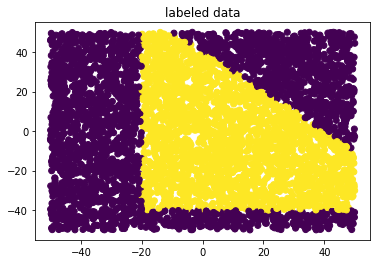

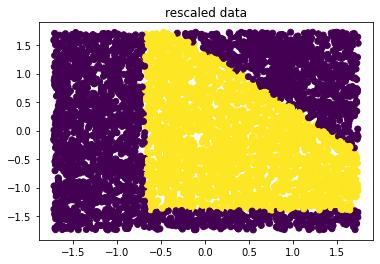

In [ ]:
# number of data
N = 5000
# box size
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x = create_data.sample_data(N, B)
y = create_data.assign_label(x)

plt.scatter(x[:,0], x[:,1], c=y)
plt.title("labeled data")
plt.show()

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

# re-scaling data 
x_scaled = preprocess.standardize(x, mean, std)

plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)
plt.title("rescaled data")
plt.show()

In [ ]:
train_frac = 0.7

N_train = int(N*train_frac)

training_data, training_labels = np.copy(x_scaled[0:N_train]), np.copy(y[0:N_train])
test_data,     test_labels     = np.copy(x_scaled[N_train:]),  np.copy(y[N_train:])

print(f"Traing set :\t{training_data.shape[0]}\nTest set  :\t{test_data.shape[0]}")

N_valid = 500

x_train, y_train = np.copy(training_data[N_valid:]),  np.copy(training_labels[N_valid:])
x_valid, y_valid = np.copy(training_data[0:N_valid]), np.copy(training_labels[0:N_valid])

print(f"\nN_train :\t{x_train.shape[0]} \nN_valid :\t{x_valid.shape[0]}")

Traing set :	3500
Test set  :	1500

N_train :	3000 
N_valid :	500


In [ ]:
n_features = x.shape[1]

# NN hyperparameters
architecture      = [n_features, 20, 20, 1]
dropout_arc       = [1]
dropout_rates     = [0.2]
batch_norm_arc    = [2]   
input_dim         = architecture[0]
hidden_activation = "relu"
output_activation = "sigmoid"
name              = "my lovely neural network"

# build the NN model
network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
)

# print summary
network.summary()

# compile NN with loss, optimizer and metrics
loss      = "binary_crossentropy"
optimizer = "adam"
metrics   = ["accuracy"]

network.compile(
    loss      = loss,
    optimizer = optimizer,
    metrics   = metrics,
)

Model: "my lovely neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 2)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              60             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                         

In [ ]:
minibatch = 100
N_epochs  = 300

fit = network.fit(
    x_train, y_train,
    epochs          = N_epochs,
    batch_size      = minibatch,
    validation_data = (x_valid, y_valid),
    verbose         = 0,
)

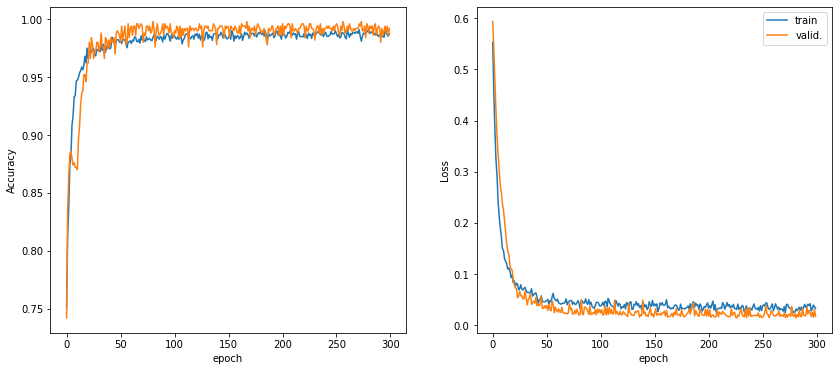

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

ax[0].plot(fit.history['accuracy'],label="train")
ax[0].plot(fit.history['val_accuracy'],label="valid.")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel("Accuracy")

ax[1].plot(fit.history['loss'],label="train")
ax[1].plot(fit.history['val_loss'],label="valid.")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.show()

In [ ]:
test = network.evaluate(
    test_data, test_labels,
    batch_size      = minibatch,
    verbose         = 0,
)

print("test loss, test acc:", test)


test loss, test acc: [0.01623484119772911, 0.9933333396911621]


In [ ]:
dx = 2
xgrid = np.arange(x.min(),x.max()+dx, dx)
l_grid = xgrid.shape[0]
grid = np.zeros((l_grid*l_grid, 2))

k=0
for i in range(l_grid):
    for j in range(l_grid):
        grid[k,:] = (xgrid[j], xgrid[i])
        k=k+1

In [ ]:
grid_scaled = preprocess.standardize(grid, np.mean(grid, axis=0), np.std(grid, axis=0))
pred        = network.predict(grid_scaled)

# if pred-label > 0.5 ==> pred-label==1
pred_binary = pred.copy()
pred_binary[pred <= 0.5] = 0
pred_binary[pred >  0.5] = 1

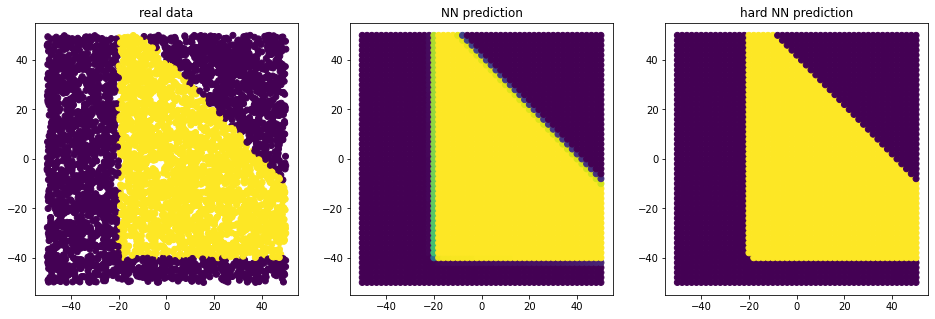

In [ ]:
def boundaries(ax):    
    ax.plot((-20,-20),(-40,50), color="white", lw=2)
    ax.plot((-20,50), (-40,-40),color="white", lw=2)
    ax.plot((-10,50), (50,-10), color="white", lw=2)
    
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))

# real data
ax[0].scatter(x[:,0], x[:,1], c=y)
ax[0].set_title("real data")

# NN prediction
ax[1].scatter(grid[:,0], grid[:,1], c=pred)
ax[1].set_title("NN prediction")

# hard NN prediction
ax[2].scatter(grid[:,0], grid[:,1], c=pred_binary)
ax[2].set_title("hard NN prediction")

plt.show()

## 1)  Study the performance of the DNN when the number N of samples is

a) reduced

b) increased

c) augmented

### 1.a


In [ ]:
# number of data
N = 5000
# box size
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x = create_data.sample_data(N, B)
# y = create_data.assign_label(x)

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

# re-scaling data 
x_scaled = preprocess.standardize(x, mean, std)

In [ ]:
reduction_rates = [1.0, 0.8, 0.6, 0.4, 0.2]
# valid_frac      = [0.7 * rate for rate in reduction_rates]

N = 5000
B = 100

x = create_data.sample_data(N, B)
# y = create_data.assign_label(x)
# x_scaled = preprocess.standardize(x, mean, std)

training_data,   test_data   = [], []
training_labels, test_labels = [], []
x_valid, y_valid = [], []

for tr_rate in reduction_rates:

    N = int(N*tr_rate)
    N_train = int(N*train_frac)
    N_valid = int(N_train * 0.7)

    permutation = np.random.permutation(N) # random permutation
    x = x[permutation]
    x_scaled = preprocess.standardize(x, mean, std)
    
    training_data.append((x_scaled[0:N_train]) )
    training_labels.append( create_data.assign_label(x[0:N_train]) )

    test_data.append((x_scaled[N_train:]) )
    test_labels.append(create_data.assign_label(x[N_train:]) )

    x_valid.append(x_scaled[0:N_valid]) 
    y_valid.append(create_data.assign_label(x[0:N_valid])) 
    


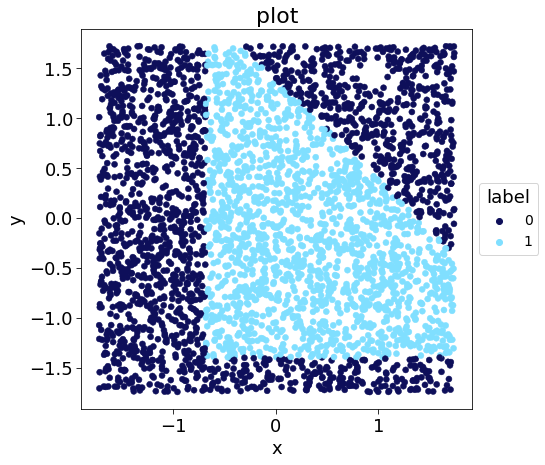

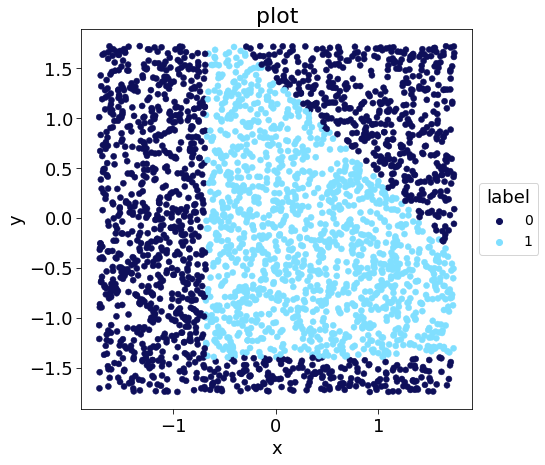

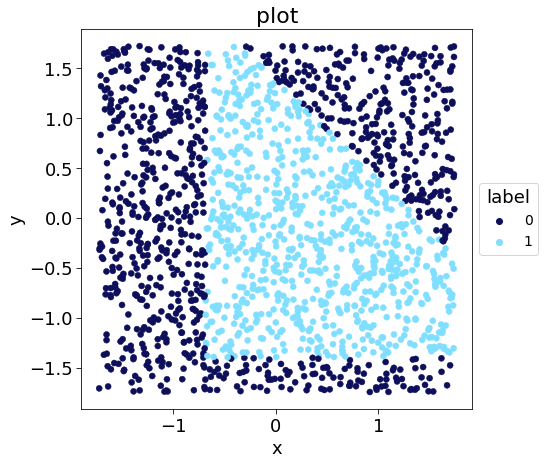

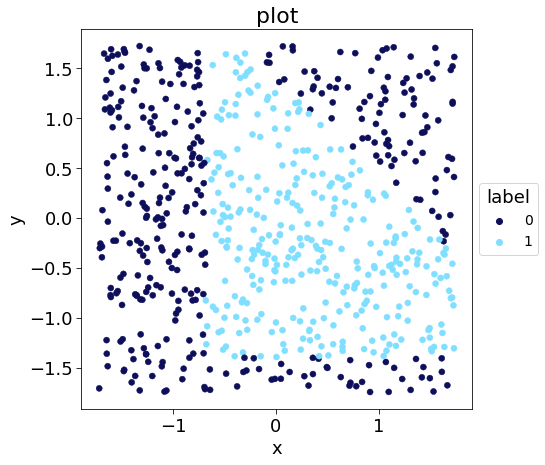

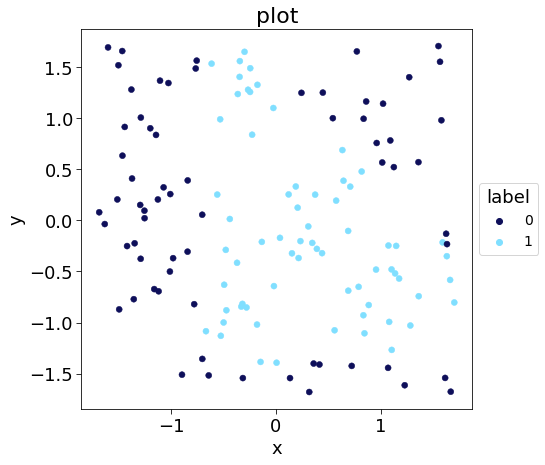

In [ ]:
from plot_utils import plot_labeled_data

for data, labels, rate in zip(training_data, training_labels, reduction_rates):
    fig = plt.figure(figsize=(7,7))
    ax = plot_labeled_data(data, labels, fig)
    plt.show()


In [ ]:
n_features = x.shape[1]

# NN hyperparameters
architecture      = [n_features, 20, 20, 1]
dropout_arc       = [1]
dropout_rates     = [0.2]
batch_norm_arc    = [2]   
input_dim         = architecture[0]
hidden_activation = "relu"
output_activation = "sigmoid"
name              = "my lovely neural network"

# build the NN model
network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
)

# print summary
network.summary()

# compile NN with loss, optimizer and metrics
loss      = "binary_crossentropy"
optimizer = "adam"
metrics   = ["accuracy"]

network.compile(
    loss      = loss,
    optimizer = optimizer,
    metrics   = metrics,
)

Model: "my lovely neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 2)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              60             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                         

In [ ]:
#training 

minibatch = 100
N_epochs  = 300

tr_acc, val_acc = [], []
tr_loss, val_loss = [], []
test_loss, test_acc = [], []

for x_tr, y_tr, x_val, y_val, x_test, y_test in zip(training_data, training_labels, x_valid, y_valid, test_data, test_labels):
# for x_tr, y_tr, x_val, y_val in zip(training_data, training_labels, x_valid, y_valid): 
#nik torna nella cella di prima per favore
    network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
    )

    network.compile(
        loss      = loss,
        optimizer = optimizer,
        metrics   = metrics,
        )


    fit = network.fit(
        x_tr, y_tr,
        epochs          = N_epochs,
        batch_size      = minibatch,
        validation_data = (x_val, y_val),
        verbose         = 0,
    )

    #taking only the final value of accuracy and loss
    # tr_acc.append(fit.history['accuracy'][-1])
    # val_acc.append(fit.history['val_accuracy'][-1])
    # tr_loss.append(fit.history['loss'][-1])
    # val_loss.append(fit.history['val_loss'][-1])
    
    tr_acc.append(fit.history['accuracy'])
    val_acc.append(fit.history['val_accuracy'])
    tr_loss.append(fit.history['loss'])
    val_loss.append(fit.history['val_loss'])

    test = network.evaluate(
        x_test, y_test,
        batch_size      = minibatch,
        verbose         = 0,
        )
    print(test)
    # test_loss.append(test[0])
    # test_acc.append(test[1])


[0.015367665328085423, 0.9959999918937683]
[0.021045450121164322, 0.9916666746139526]
[0.01389919500797987, 0.9930555820465088]
[0.02640027552843094, 0.9895833134651184]
[0.10702008754014969, 0.9655172228813171]


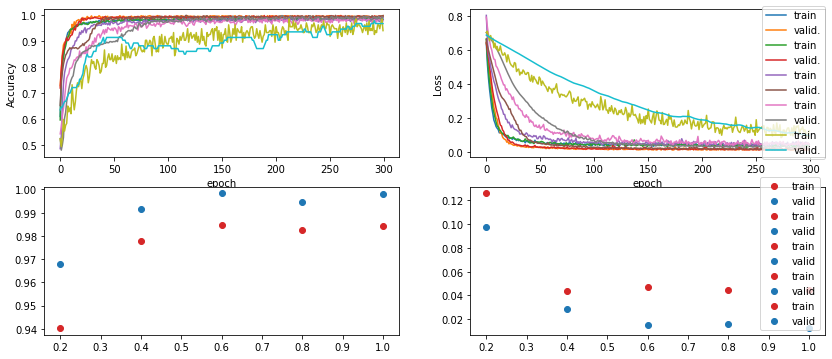

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,6))
ax[0,0].set_xlabel('epoch'); ax[0,0].set_ylabel("Accuracy")
ax[0,1].set_xlabel('epoch'); ax[0,1].set_ylabel("Loss"); 

for acc,val, rate in zip(tr_acc, val_acc, reduction_rates):
    ax[0,0].plot(acc,label="train")
    ax[0,0].plot(val,label="valid.")
    
    ax[1,0].scatter(rate,acc[-1],label="train",color='tab:red')
    ax[1,0].scatter(rate,val[-1],label="valid",color='tab:blue')


for acc,val,rate in zip(tr_loss, val_loss,reduction_rates):
    ax[0,1].plot(acc,label="train")
    ax[0,1].plot(val,label="valid.")
    
    ax[1,1].scatter(rate,acc[-1],label="train", color='tab:red')
    ax[1,1].scatter(rate,val[-1],label="valid", color='tab:blue')

ax[0,1].legend(loc='center right',borderaxespad=0)
# ax[0,0].legend(loc='center left')
ax[1,1].legend(loc='lower right')
# ax[1,0.legend(loc='center left')
plt.show()

### 1b) more data



In [ ]:
N = 5000
increasing_rates = [1, 1.5, 2, 2.5, 3]
N_sample = [int(N*i) for i in increasing_rates]
N_valid = [int(0.7 * N) for N in N_sample]

x_training,  x_test = [], []
y_training, y_test = [], []
x_valid, y_valid = [], []

for rate in increasing_rates:

    N = int(N*rate)
    N_train = int(N*train_frac)
    N_valid = int(N_train * 0.7)

    x = create_data.sample_data(N, B)
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)

    x_scaled = preprocess.standardize(x, mean, std)

    x_training.append( np.copy(x_scaled[0:N_train]) )
    y_training.append( create_data.assign_label(x[0:N_train]) )

    x_test.append( np.copy(x_scaled[N_train:]) )
    y_test.append( create_data.assign_label(x[N_train:]) )
  
    x_valid = np.copy(x_training[0:N_valid])
    y_valid = np.copy(y_training[0:N_valid])



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/numpy/lib/function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


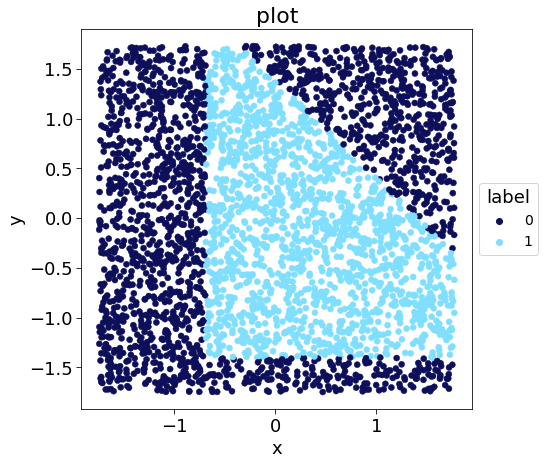

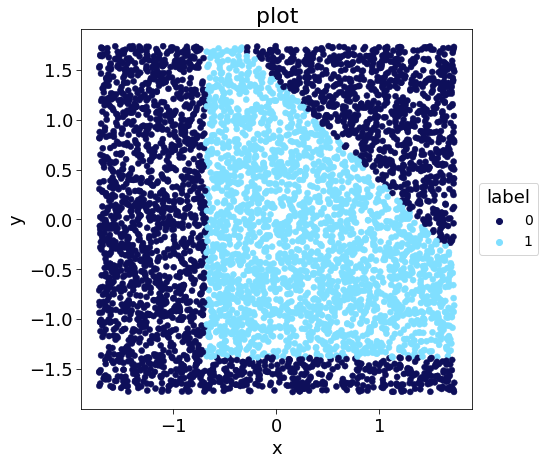

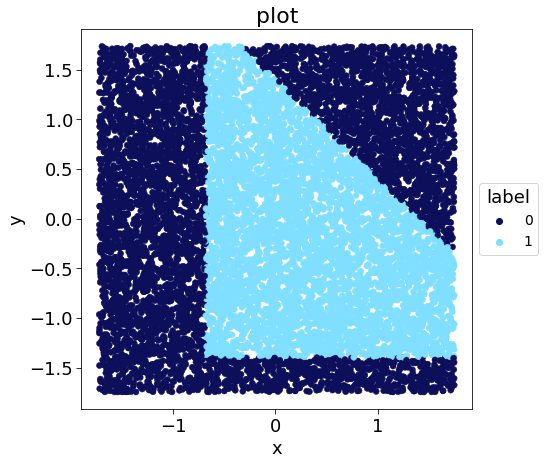

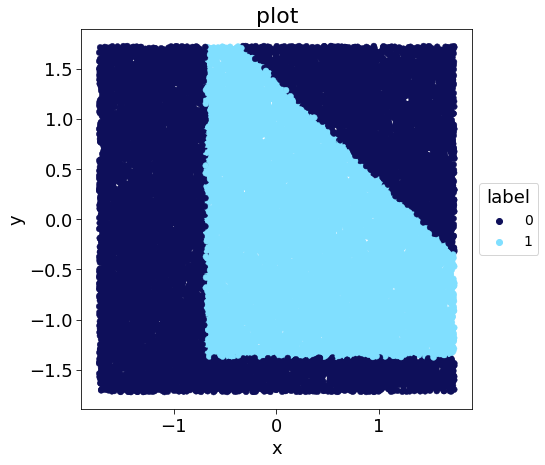

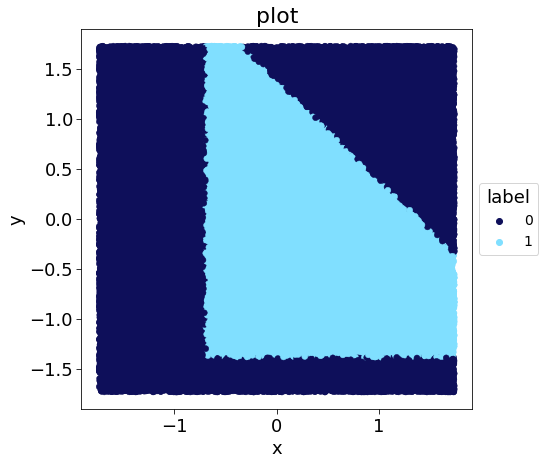

In [ ]:
for data, labels in zip(x_valid, y_valid):
    fig = plt.figure(figsize=(7,7))
    ax = plot_labeled_data(data, labels, fig)
plt.show()

In [ ]:
#training 

minibatch = 100
N_epochs  = 300

tr_acc, val_acc = [], []
tr_loss, val_loss = [], []
test_loss, test_acc = [], []

for x_tr, y_tr, x_val, y_val, x_ts, y_ts in zip(x_training, y_training, x_valid, y_valid, x_test, y_test):

    network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
    )

    network.compile(
        loss      = loss,
        optimizer = optimizer,
        metrics   = metrics,
        )

    fit = network.fit(
        x_tr, y_tr,
        epochs          = N_epochs,
        batch_size      = minibatch,
        validation_data = (x_val, y_val),
        verbose         = 0,
    )
    #taking only the final value of accuracy and loss
    # tr_acc.append(fit.history['accuracy'][-1])
    # val_acc.append(fit.history['val_accuracy'][-1])
    # tr_loss.append(fit.history['loss'][-1])
    # val_loss.append(fit.history['val_loss'][-1])
    
    tr_acc.append(fit.history['accuracy'])
    val_acc.append(fit.history['val_accuracy'])
    tr_loss.append(fit.history['loss'])
    val_loss.append(fit.history['val_loss'])
    
    test = network.evaluate(
        x_ts, y_ts,
        batch_size      = minibatch,
        verbose         = 0,
        )
    print(test)

[0.013422961346805096, 0.996666669845581]


KeyboardInterrupt: 

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
# ax[0].set_xlabel('epoch'); ax[0].set_ylabel("Accuracy")
# ax[1].set_xlabel('epoch'); ax[1].set_ylabel("Loss"); ax[1].legend()

# for acc,val in zip(tr_acc, val_acc):
#     ax[0].plot(acc,label="train")
#     ax[0].plot(val,label="valid.")
# for acc,val in zip(tr_loss, val_loss):
#     ax[1].plot(acc,label="train")
#     ax[1].plot(val,label="valid.")

# plt.show()

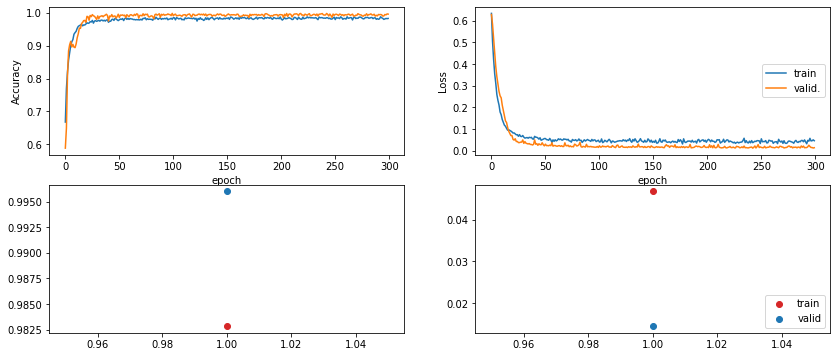

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,6))
ax[0,0].set_xlabel('epoch'); ax[0,0].set_ylabel("Accuracy")
ax[0,1].set_xlabel('epoch'); ax[0,1].set_ylabel("Loss"); 

for acc,val,rate in zip(tr_acc, val_acc, increasing_rates):
    ax[0,0].plot(acc,label="train")
    ax[0,0].plot(val,label="valid.")
    
    ax[1,0].scatter(rate,acc[-1],label="train",color='tab:red')
    ax[1,0].scatter(rate,val[-1],label="valid",color='tab:blue')


for acc,val,rate in zip(tr_loss, val_loss, increasing_rates):
    ax[0,1].plot(acc,label="train")
    ax[0,1].plot(val,label="valid.")
    
    ax[1,1].scatter(rate,acc[-1],label="train", color='tab:red')
    ax[1,1].scatter(rate,val[-1],label="valid", color='tab:blue')

ax[0,1].legend(loc='center right')
# ax[0,0].legend(loc='center left')
ax[1,1].legend(loc='lower right')
# ax[1,0].legend(loc='center left')
plt.show()

### 1c) augmented

In [ ]:
N = 10
data = np.array(create_data.sample_data(N, B))
print(len(data))
trasl_data=[]
# for dat in data:
for dat in data[:10]:
    v = np.array( (np.random.random(2)-0.5)*20 )
    trasl_data.append( dat+v )
    # data = np.append(data, dat+v)

trasl_data = np.array(trasl_data)
data = np.concatenate((data, trasl_data))
print((data.shape))



10
(20, 2)


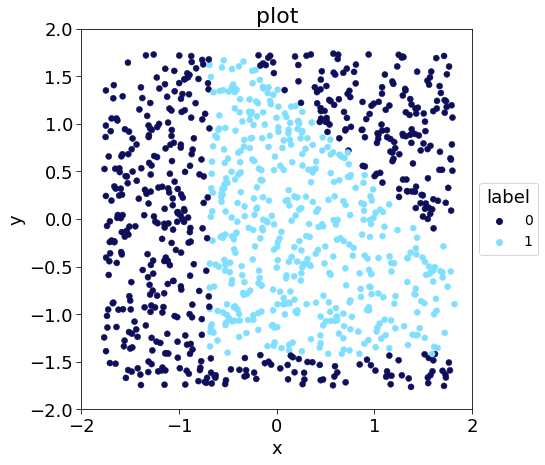

1000
1400
1400


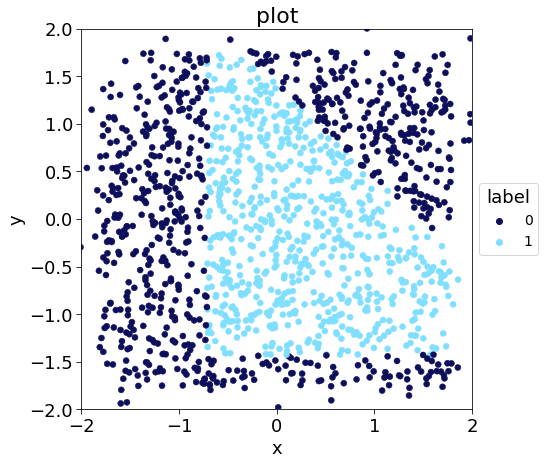

In [ ]:
def simulate(x):
    '''funzione che simula i dati
    prende in ingresso i dati in un np.array(!), prende i primi 20% dei dati e poi li trasla'''
    
    permutation1 = np.random.permutation(len(x)) # random permutation
    x = x[permutation1]
    # x_scaled = preprocess.standardize(x, mean, std)

    trasl_data=[]
    m = int(len(x) * 0.4) #20 percento dei dati
    for dat in x[:m]:
        v = np.array( (np.random.random(2)-0.5)*20 ) # vettore traslazione
        trasl_data.append( dat + v )

    trasl_data = np.array(trasl_data)
    data = np.concatenate((x, trasl_data))
    # permutation2 = np.random.permutation(len(data)) # random permutation
    # data = data[permutation2]
    return data

N=1000
dati = np.array(create_data.sample_data(N, B))
labels =  create_data.assign_label(dati) 

mean = np.mean(dati, axis=0) ; std = np.std(dati, axis=0)
dati_scaled = preprocess.standardize(dati,mean,std)

fig = plt.figure(figsize=(7,7))
ax = plot_labeled_data(dati_scaled, labels, fig)
ax.set_xbound([-2,2]); ax.set_ybound([-2,2])
plt.show()

print(len(dati))
dati = simulate(dati)
labels = create_data.assign_label(dati)

mean = np.mean(dati, axis=0); std = np.std(dati, axis=0)
dati_scaled = preprocess.standardize(dati,mean,std)

print(len(dati))
print(len(labels))

fig = plt.figure(figsize=(7,7))
ax = plot_labeled_data(dati_scaled, labels, fig)
ax.set_xbound([-2,2]); ax.set_ybound([-2,2])
plt.show()


In [ ]:
N=3000
X = np.array(create_data.sample_data(N, B))

X_training,  X_test = [], []
Y_training, Y_test = [], []
X_valid, Y_valid = [], []
m_train = []
for i in range(4):
    X = simulate(X) #i dati non sono normalizzati

    mean = np.mean(X, axis=0) ; std = np.std(X, axis=0)
    X_scaled = preprocess.standardize(X, mean, std)

    N = len(X)
    N_train = int(N*train_frac)
    N_valid = int(N_train*0.7)
    m_train.append(N_train)

    X_training.append( X_scaled[0:N_train] )
    Y_training.append( create_data.assign_label(X[0:N_train]) )

    X_test.append( np.copy(X_scaled[N_train:]) )
    Y_test.append( create_data.assign_label(X[N_train:]) )
    
    X_valid.append( X_scaled[0:N_valid] )
    Y_valid.append( create_data.assign_label(X[0:N_valid]) )

    # print(f'training size {len(X_training[i])}, {len(Y_training[i])}')
    # print(f'val {len(X_valid[i])},{len(Y_valid[i])}')
    # print(f'test {len(X_test[i])},{len(Y_test[i])}')


In [ ]:
tr_acc, val_acc = [], []
tr_loss, val_loss = [], []
test_loss, test_acc = [], []

for x_tr, y_tr, x_val, y_val, x_ts, y_ts in zip(X_training, Y_training, X_valid, Y_valid, X_test, Y_test):

    network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
    )

    network.compile(
        loss      = loss,
        optimizer = optimizer,
        metrics   = metrics,
        )

    fit = network.fit(
        x_tr, y_tr,
        epochs          = N_epochs,
        batch_size      = minibatch,
        validation_data = (x_val, y_val),
        verbose         = 0,
    )
    
    tr_acc.append(fit.history['accuracy'])
    val_acc.append(fit.history['val_accuracy'])
    tr_loss.append(fit.history['loss'])
    val_loss.append(fit.history['val_loss'])
    
    test = network.evaluate(
        x_ts, y_ts,
        batch_size      = minibatch,
        verbose         = 0,
        )
    print(test)

[0.017928101122379303, 0.9920634627342224]
[0.02039244957268238, 0.9931972622871399]
[0.022096913307905197, 0.9890688061714172]
[0.015612144954502583, 0.9953730702400208]


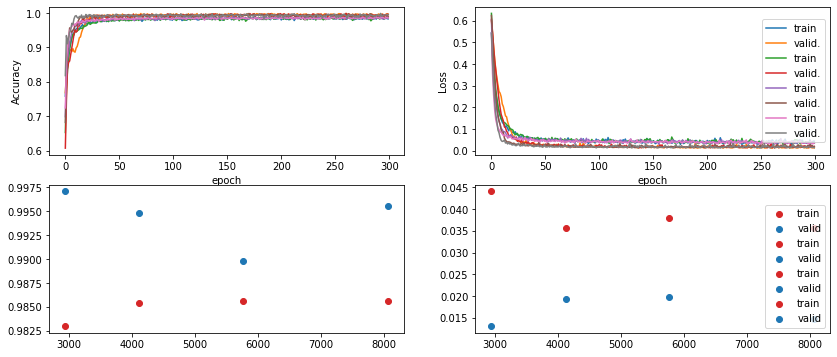

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,6))
ax[0,0].set_xlabel('epoch'); ax[0,0].set_ylabel("Accuracy")
ax[0,1].set_xlabel('epoch'); ax[0,1].set_ylabel("Loss"); 

rates = range(4)

for acc,val,m in zip(tr_acc, val_acc, m_train):
    ax[0,0].plot(acc,label="train")
    ax[0,0].plot(val,label="valid.")
    
    ax[1,0].scatter(m,acc[-1],label="train",color='tab:red')
    ax[1,0].scatter(m,val[-1],label="valid",color='tab:blue')


for acc,val,m in zip(tr_loss, val_loss, m_train):
    ax[0,1].plot(acc,label="train")
    ax[0,1].plot(val,label="valid.")
    
    ax[1,1].scatter(m,acc[-1],label="train", color='tab:red')
    ax[1,1].scatter(m,val[-1],label="valid", color='tab:blue')

ax[0,1].legend(loc='center right')
# ax[0,0].legend(loc='center left')
ax[1,1].legend(loc='lower right')
# ax[1,0].legend(loc='center left')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=452e6836-b7b8-455e-80d9-d4109b6baddf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>